## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import os
from glob import glob

## Mount Googe Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data From Google Drive and Unzip it

In [3]:
!unzip -xq "/content/drive/MyDrive/Colab Notebooks/Food_Classification/food.zip"

## Define Train and Test Path

In [4]:
TRAIN_DIR = "/content/food/train/"
TEST_DIR = "/content/food/test/"

## Get Class Names From Directories

In [5]:
class_name = sorted(os.listdir(TRAIN_DIR))
class_name

['baklava',
 'caesar_salad',
 'cheese_sandwich',
 'cheesecake',
 'chicken_curry',
 'chicken_wings',
 'chocolate_cake',
 'donuts',
 'eggs',
 'falafel',
 'fish',
 'french_fries',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'lasagna',
 'omelette',
 'pizza',
 'spaghetti',
 'steak',
 'sushi']

## Another Way To Get Class Names

In [6]:
glob(f"{TRAIN_DIR}*")

['/content/food/train/donuts',
 '/content/food/train/ice_cream',
 '/content/food/train/omelette',
 '/content/food/train/lasagna',
 '/content/food/train/caesar_salad',
 '/content/food/train/chicken_wings',
 '/content/food/train/eggs',
 '/content/food/train/falafel',
 '/content/food/train/cheese_sandwich',
 '/content/food/train/steak',
 '/content/food/train/chicken_curry',
 '/content/food/train/fish',
 '/content/food/train/french_fries',
 '/content/food/train/sushi',
 '/content/food/train/hot_dog',
 '/content/food/train/pizza',
 '/content/food/train/chocolate_cake',
 '/content/food/train/cheesecake',
 '/content/food/train/baklava',
 '/content/food/train/spaghetti',
 '/content/food/train/hamburger']

## Look How Many Files in Train Directory

In [7]:
totalFiles = 0

for dir in sorted(glob(f"{TRAIN_DIR}*")):
  totalFiles += len(glob(f"{dir}/*"))

print('Total number of files',totalFiles)
print('Total Number of directories',len(sorted(glob(f"{TRAIN_DIR}*"))))

Total number of files 17552
Total Number of directories 21


In [8]:
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(TRAIN_DIR):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

Searching in :  /content/food/train/
Searching in :  /content/food/train/donuts
Searching in :  /content/food/train/ice_cream
Searching in :  /content/food/train/omelette
Searching in :  /content/food/train/lasagna
Searching in :  /content/food/train/caesar_salad
Searching in :  /content/food/train/chicken_wings
Searching in :  /content/food/train/eggs
Searching in :  /content/food/train/falafel
Searching in :  /content/food/train/cheese_sandwich
Searching in :  /content/food/train/steak
Searching in :  /content/food/train/chicken_curry
Searching in :  /content/food/train/fish
Searching in :  /content/food/train/french_fries
Searching in :  /content/food/train/sushi
Searching in :  /content/food/train/hot_dog
Searching in :  /content/food/train/pizza
Searching in :  /content/food/train/chocolate_cake
Searching in :  /content/food/train/cheesecake
Searching in :  /content/food/train/baklava
Searching in :  /content/food/train/spaghetti
Searching in :  /content/food/train/hamburger
Total

## Show Some Sample

image shape:  (512, 511, 3)


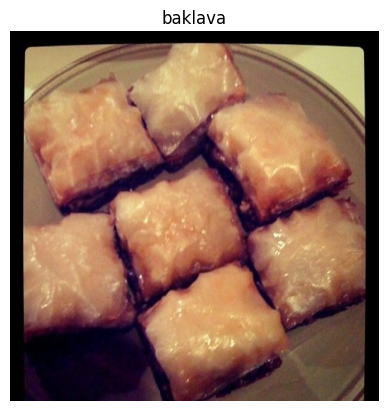

In [9]:
image_path = "/content/food/train/baklava/014VVHEIKVVDG.jpg"
img = cv2.imread(image_path)[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(image_path.split('/')[-2])
plt.show()

image shape:  (512, 512, 3)


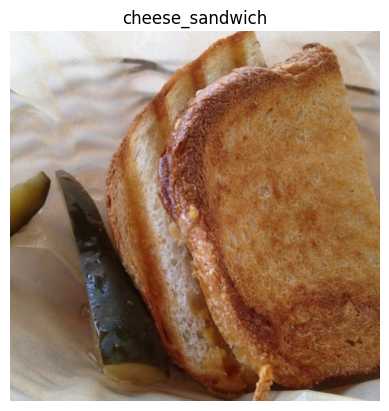

In [10]:
image_path = "/content/food/train/cheese_sandwich/034OURJ3LWRFL.jpg"
img = cv2.imread(image_path)[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(image_path.split('/')[-2])
plt.show()

image shape:  (330, 512, 3)


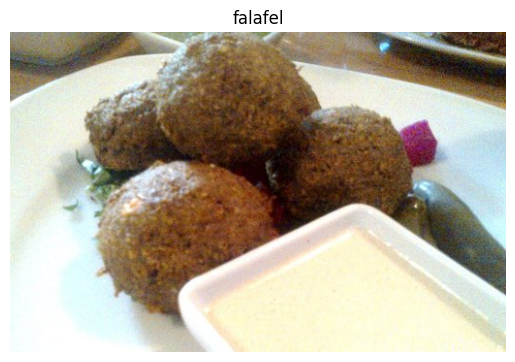

In [11]:
image_path = "/content/food/train/falafel/006FF2GTUWC9O.jpg"
img = cv2.imread(image_path)[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(image_path.split('/')[-2])
plt.show()

## Resize Train Images

In [12]:
from PIL import Image

for dir in sorted(glob(f"{TRAIN_DIR}*")):
  for files in glob(f"{dir}/*"):
    img = Image.open(files)
    img = img.resize((224,224))
    img.save(files)

image shape:  (224, 224, 3)


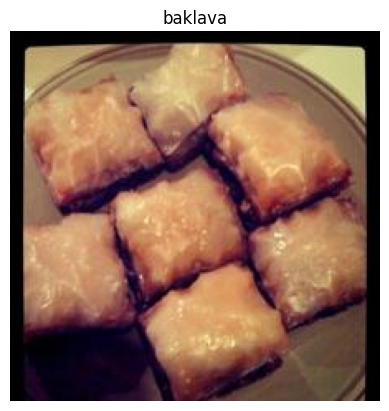

In [13]:
image_path = "/content/food/train/baklava/014VVHEIKVVDG.jpg"
img = cv2.imread(image_path)[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(image_path.split('/')[-2])
plt.show()

image shape:  (224, 224, 3)


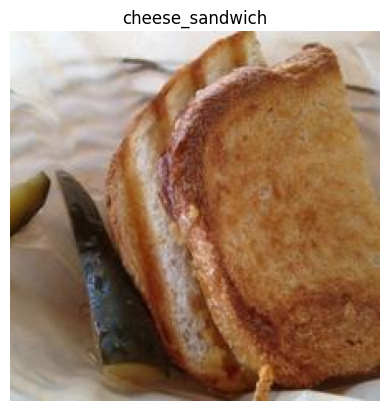

In [14]:
image_path = "/content/food/train/cheese_sandwich/034OURJ3LWRFL.jpg"
img = cv2.imread(image_path)[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(image_path.split('/')[-2])
plt.show()

image shape:  (224, 224, 3)


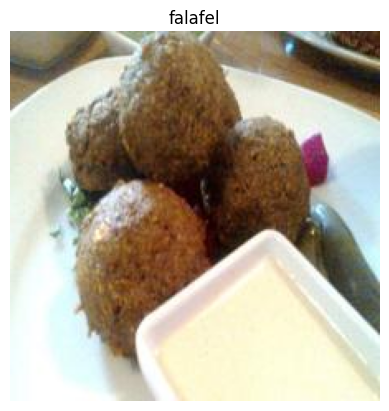

In [15]:
image_path = "/content/food/train/falafel/006FF2GTUWC9O.jpg"
img = cv2.imread(image_path)[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(image_path.split('/')[-2])
plt.show()

## Resize Test Images

In [16]:
len(glob(f"{TEST_DIR}*"))

4276

In [17]:
for dir in glob(f"{TEST_DIR}*"):
  img = Image.open(dir)
  img = img.resize((224,224))
  img.save(dir)

## Create Train and Test DataSet With Loading From Directory

In [18]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64

train_ds = keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    batch_size = BATCH_SIZE,
    labels='inferred',
    label_mode='categorical',
    color_mode = 'rgb',
    image_size = (IMG_HEIGHT,IMG_WIDTH)
    )

test_ds = keras.utils.image_dataset_from_directory(
    TEST_DIR,
    batch_size = BATCH_SIZE,
    label_mode = None,
    color_mode = 'rgb',
    shuffle = False,
    image_size = (IMG_HEIGHT,IMG_WIDTH)
    )

Found 17552 files belonging to 21 classes.
Found 4276 files belonging to 1 classes.


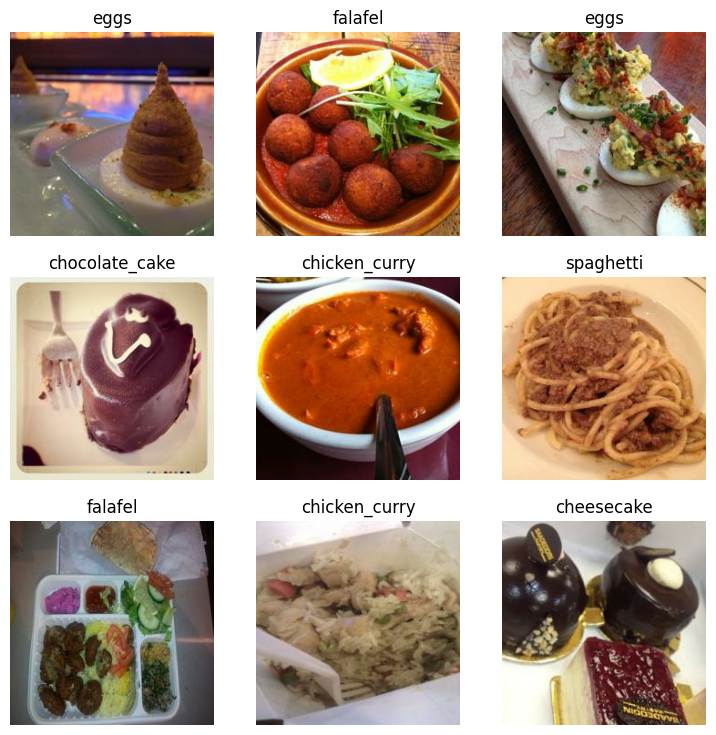

In [19]:
plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
  lbl=labels.numpy()
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[np.argmax(lbl[i])])
    plt.axis("off")

## Transfer Learning

Now I want to build a back bone for my NN using EfficientNetB0 application

In [20]:
from keras.applications import EfficientNetB0, MobileNetV2
# BackBone
pretrained_model = EfficientNetB0(
    input_shape = (IMG_HEIGHT, IMG_WIDTH, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
)

16705208/16705208 [==============================] - 0s 0us/step


Set trainable params to False and get last layer of EfficientNetB0

In [21]:
for layer in pretrained_model.layers:
  layer.trainable = False

last_layer = pretrained_model.get_layer(index=-1)
last_layer_output = last_layer.output

### Develop My NN

In [22]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Dropout, Rescaling
from keras import regularizers

x = Rescaling(scale=1./255.)(last_layer_output)
x = Flatten(name="flatten")(x)
x = Dense(1024, activation="relu", name="layer1")(x)
x = Dense(2048, activation="relu", name="layer2")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu", name="layer3")(x)
x = Dense(256, activation="relu", name="layer4")(x)
x = Dropout(0.2)(x)
output = Dense(21, activation="softmax", name="output")(x)

cnn_model = Model(inputs=pretrained_model.input, outputs=output)

In [23]:
cnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

### Compile Model

In [24]:
from keras.losses import CategoricalCrossentropy

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit Model

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_earlystop_callback = EarlyStopping(
    monitor = 'loss',
    patience = 5,
    mode = 'min',
    restore_best_weights=True,
    start_from_epoch = 5
    )

model_checkpoint_callback = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Colab Notebooks/Food_Classification/',
    save_weights_only=True,
    monitor = 'loss',
    mode = 'min',
    save_best_only=True
    )

history = cnn_model.fit(train_ds, epochs=50)

Epoch 1/50
275/275 [==============================] - 88s 229ms/step - loss: 1.8508 - accuracy: 0.4248
Epoch 2/50
275/275 [==============================] - 62s 224ms/step - loss: 1.1049 - accuracy: 0.6628
Epoch 3/50
275/275 [==============================] - 58s 211ms/step - loss: 0.8881 - accuracy: 0.7355
Epoch 4/50
275/275 [==============================] - 62s 224ms/step - loss: 0.7609 - accuracy: 0.7764
Epoch 5/50
275/275 [==============================] - 62s 226ms/step - loss: 0.6828 - accuracy: 0.7995
Epoch 6/50
275/275 [==============================] - 61s 220ms/step - loss: 0.6207 - accuracy: 0.8181
Epoch 7/50
275/275 [==============================] - 65s 234ms/step - loss: 0.5537 - accuracy: 0.8375
Epoch 8/50
275/275 [==============================] - 61s 222ms/step - loss: 0.5119 - accuracy: 0.8508
Epoch 9/50
275/275 [==============================] - 61s 222ms/step - loss: 0.4618 - accuracy: 0.8634
Epoch 10/50
275/275 [==============================] - 57s 205ms/step - l

### Plot Train Accuracy and Loss

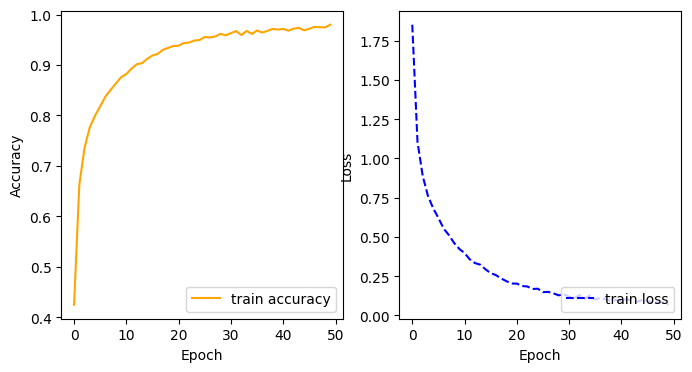

In [26]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='blue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [27]:
history = cnn_model.fit(train_ds, epochs=30)

Epoch 1/30
275/275 [==============================] - 63s 230ms/step - loss: 0.0718 - accuracy: 0.9780
Epoch 2/30
275/275 [==============================] - 61s 222ms/step - loss: 0.0757 - accuracy: 0.9767
Epoch 3/30
275/275 [==============================] - 64s 232ms/step - loss: 0.0698 - accuracy: 0.9780
Epoch 4/30
275/275 [==============================] - 70s 256ms/step - loss: 0.0776 - accuracy: 0.9772
Epoch 5/30
275/275 [==============================] - 67s 244ms/step - loss: 0.0726 - accuracy: 0.9768
Epoch 6/30
275/275 [==============================] - 60s 218ms/step - loss: 0.0758 - accuracy: 0.9776
Epoch 7/30
275/275 [==============================] - 64s 231ms/step - loss: 0.0752 - accuracy: 0.9782
Epoch 8/30
275/275 [==============================] - 64s 232ms/step - loss: 0.0709 - accuracy: 0.9787
Epoch 9/30
275/275 [==============================] - 62s 223ms/step - loss: 0.0703 - accuracy: 0.9797
Epoch 10/30
275/275 [==============================] - 61s 222ms/step - l

### Plot Test Images With Thier Predicted Values

2/2 [==============================] - 2s 19ms/step


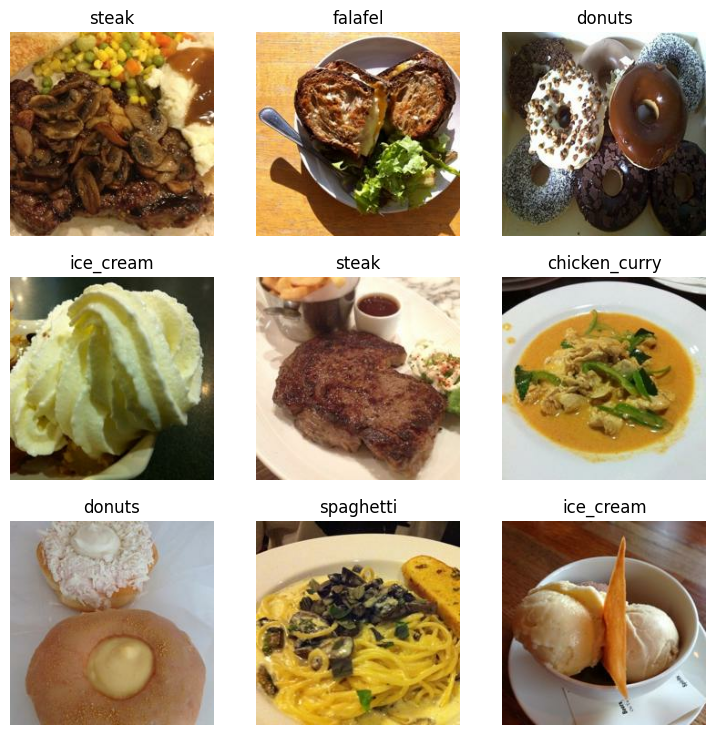

In [28]:
plt.figure(figsize=(9, 9))
for images in test_ds.take(1):
  pred = cnn_model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[np.argmax(pred[i])])
    plt.axis("off")

### Anticipate Test Images

In [29]:
prediction = np.array([])
for images in test_ds.take(tf.data.experimental.cardinality(test_ds)):
  pred = cnn_model.predict(images)
  prediction = np.concatenate((prediction, np.argmax(pred, axis=1)))

2/2 [==============================] - 3s 1s/step


In [30]:
prediction.shape

(4276,)

### Set the Name of the Classes to predicted Values

In [31]:
output = [class_name[p] for p in prediction.astype('int32')]

### Create Pandas DataFrame And CSV File

In [32]:
final_out = pd.DataFrame({"file":sorted(os.listdir(TEST_DIR)), "prediction":output})
final_out.head(10)

,file,prediction
0,005YYST06V93A.jpg,steak
1,011VG8PFN3W2W.jpg,falafel
2,014XUHGNX7Z1M.jpg,donuts
3,015PRJQGBF6NB.jpg,ice_cream
4,01BRGL0J9UUGM.jpg,steak
5,01FOOXYUKVYKN.jpg,chicken_curry
6,01P5WFVKAEQF6.jpg,donuts
7,025JXTP2VH8GW.jpg,spaghetti
8,02EYH5OIZGWT6.jpg,ice_cream
9,02ND71V9ZX26O.jpg,fish


In [33]:
final_out.to_csv('/content/drive/MyDrive/Colab Notebooks/Food_Classification/output.csv', index=False)